# Libraries

In [112]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np 

# Canny edge detection function 

In [113]:
def canny (image) :
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY); # gray scale 
    hls = cv2.cvtColor(test_image , cv2.COLOR_RGB2HLS)
    s = hls [:,:,2]
    filter_size = 5 ;
    blur = cv2.GaussianBlur(s,(filter_size,filter_size),0);
    canny = cv2.Canny(blur,50,150); # 50 & 150 are the threshold values 
    return canny
    

# Perspective Transfrom

In [114]:
def binary(img):
    detected_image = canny(img) ; #output of canny detection 
    # Vertices extracted manually for performing a perspective transform
    bottom_left = [220,715]
    bottom_right = [1110, 715]
    top_left = [570, 470]
    top_right = [722, 470]

    source = np.float32([bottom_left,bottom_right,top_right,top_left])

    # Draw lines in image by these points by red color and its closed shape 
    pts = np.array([bottom_left,bottom_right,top_right,top_left], np.int32)
    #print(pts,pts.shape)
    pts = pts.reshape((4,1,2)) # to make each point as a list
    #print(pts,pts.shape)
    copy = img.copy()
    is_closed = True        
    cv2.polylines(copy,[pts],is_closed,(255,0,0), thickness=3) 
   
    
    # Destination points are chosen such that straight lanes appear more or less parallel in the transformed image.
    bottom_left = [320,720]
    bottom_right = [920, 720]
    top_left = [320, 1]
    top_right = [920, 1]

    dst = np.float32([bottom_left,bottom_right,top_right,top_left])
    M = cv2.getPerspectiveTransform(source, dst) 
    # M is the matrix of perspective which mutliply with original and get the wrapped image
    M_inv = cv2.getPerspectiveTransform(dst, source)
    print(img.shape)
    img_size = (img.shape[1], img.shape[0]) 
    warped = cv2.warpPerspective(detected_image, M, img_size , flags=cv2.INTER_LINEAR)
    return warped, M_inv,copy

# Test_Image 

(720, 1280, 3)


Text(0.5, 1.0, 'Warped Image')

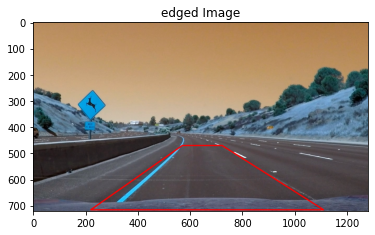

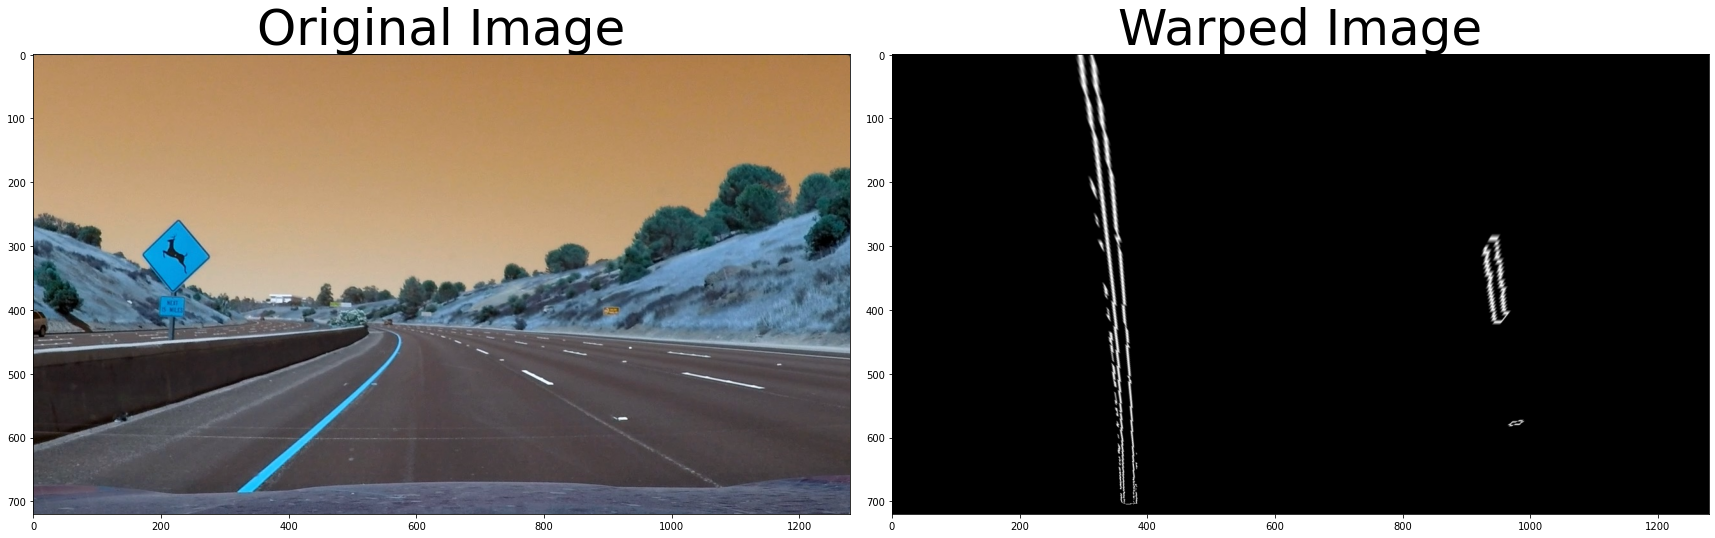

In [115]:
test_image = cv2.imread('test2.jpg')
warped, M_inv,edged_one = binary(test_image)
plt.imshow(edged_one, cmap='gray')
plt.title('edged Image')

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped Image', fontsize=50)

# Vedio

In [116]:
#import numpy as np
#import cv2
#from google.colab.patches import cv2_imshow #if not using colab delete this line
cap = cv2.VideoCapture('project_video.mp4') #enter the url of the video
while(cap.isOpened()):
  ret, frame = cap.read() #the frame is like the image
  #print(ret)
  if ret == True:
    warped, M_inv,edged_one = binary(frame)
    # Display the resulting frame19
    cv2.imshow('Frame',edged_one)
  ###################code edge detection ################################
  #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

########################end of code##############################
  #cv2_imshow(gray) # if not using collab make the function : cv2.imshaow("title",gray)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()


# Histogram

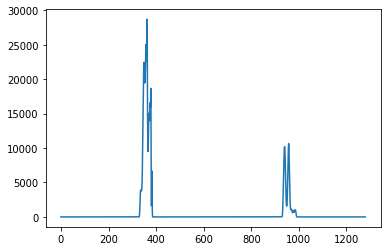

In [117]:

plt.plot(histogram);

# Sliding Window Search

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


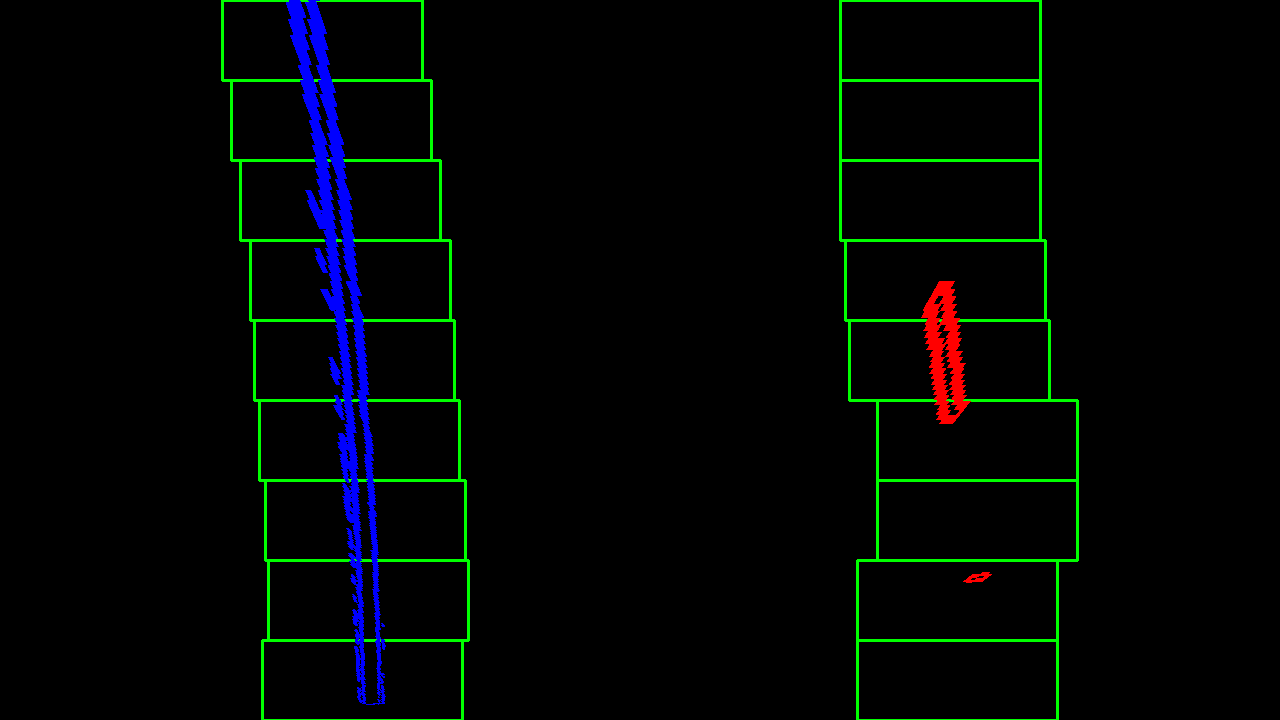

In [118]:
from google.colab.patches import cv2_imshow
def fitlines(warped):
  histogram=np.sum(warped[warped.shape[0]//2:,:],axis=0)
  
  midpoint=np.int(histogram.shape[0]/2)
  leftx=np.argmax(histogram[:midpoint])
  rightx=np.argmax(histogram[midpoint:])+midpoint
  out_img = np.dstack((warped, warped, warped))*255
  windowsnum=9
  window_height=int(warped.shape[0]/windowsnum)
  leftx_curr=leftx
  rightx_curr=rightx
  halfWindowWidth=100
  minpix = 50
  nonzero = warped.nonzero()
  nonzeroy = np.array(nonzero[0])
  nonzerox = np.array(nonzero[1])
  left_lane_inds = []
  right_lane_inds = []
# print(nonzero)
# print(nonzerox)
#print(nonzeroy)
# print(warped)


  for window in range(windowsnum):
    winYlow=warped.shape[0]-(window+1)*window_height
    winYhigh=warped.shape[0]-window*window_height
    win_xleft_low=leftx_curr-halfWindowWidth
    win_xleft_high=leftx_curr+halfWindowWidth
    win_xright_low=rightx_curr-halfWindowWidth
    win_xright_high=rightx_curr+halfWindowWidth
    cv2.rectangle(out_img,(win_xleft_low,winYlow),(win_xleft_high,winYhigh),
      (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,winYlow),(win_xright_high,winYhigh),(0,255,0), 2) 
    good_left_inds = ((nonzeroy >= winYlow) & (nonzeroy < winYhigh) & 
      (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= winYlow) & (nonzeroy < winYhigh) & 
      (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    if len(good_left_inds) > minpix:
          leftx_curr = int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
          rightx_curr = int(np.mean(nonzerox[good_right_inds]))

    # print(good_left_inds)
    # print(good_right_inds)
    # print( nonzeroy,winYlow,nonzeroy >= winYlow)

  left_lane_inds = np.concatenate(left_lane_inds)
  right_lane_inds = np.concatenate(right_lane_inds)
  leftx = nonzerox[left_lane_inds]
  lefty = nonzeroy[left_lane_inds] 
  rightx = nonzerox[right_lane_inds]
  righty = nonzeroy[right_lane_inds] 

  if len(leftx) == 0:
      left_fit =[]
  else:
      left_fit = np.polyfit(lefty, leftx, 2)
  
  if len(rightx) == 0:
      right_fit =[]
  else:
      right_fit = np.polyfit(righty, rightx, 2)

    
  out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
  out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
  #cv2_imshow(out_img)
  ploty = np.linspace(0, warped.shape[0]-1, warped.shape[0] )

  return left_fit, right_fit,out_img, lefty, leftx, righty, rightx, ploty

left_fit, right_fit, out_img, lefty, leftx, righty, rightx, ploty = fitlines(warped)
